## **Data Cleaning and Overview**

---





*   Import libraries
*   Clean the dataframe



In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd
from collections import Counter

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Export CSV to Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Mounted at /content/drive


In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv')

In [3]:
# Check the dataset loaded correctly
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [4]:
# Check the shape
df.shape

(398, 8)

In [5]:
# Check for null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

No null variables in any columns, so no need to drop any rows.

In [6]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [7]:
# Create a new column with only the manufacturer name
df['manufacturer'] = df['car name'].str.split().str[0]

Create a new column with just the manufacturer name so I can investigate trends by manufacturer.

In [8]:
# Check that the new column was created successfully
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,manufacturer
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,ford torino,ford


In [9]:
# Remove all rows with value '?' in the horsepower column
df = df[df['horsepower'] != '?']

Some rows have a "?" in the horsepower column. These have been removed removed.

In [10]:
# Recheck the shape
df.shape

(392, 9)

In [11]:
# Print the counts for all manufacturers
manufacturer_counts = df['manufacturer'].value_counts()

for manufacturer, count in manufacturer_counts.items():
    print(f'{manufacturer}: {count}')


ford: 48
chevrolet: 43
plymouth: 31
dodge: 28
amc: 27
toyota: 25
datsun: 23
buick: 17
pontiac: 16
volkswagen: 15
honda: 13
mercury: 11
mazda: 10
oldsmobile: 10
fiat: 8
peugeot: 8
audi: 7
vw: 6
chrysler: 6
volvo: 6
opel: 4
saab: 4
subaru: 4
chevy: 3
renault: 3
maxda: 2
cadillac: 2
bmw: 2
mercedes-benz: 2
triumph: 1
vokswagen: 1
mercedes: 1
hi: 1
capri: 1
chevroelt: 1
toyouta: 1
nissan: 1


In [12]:
# Consolidate mispellings and alternate spellings
df['manufacturer'].replace({'chevy': 'chevrolet', 'chevroelt': 'chevrolet', 'toyouta': 'toyota'}, inplace=True)

In [13]:
# Convert integer columns to strings
df['cylinders'] = df['cylinders'].astype(str)
df['model year'] = df['model year'].astype(str)
df['horsepower'] = df['horsepower'].astype(float)

In [14]:
# Recheck the data type for altered columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    object 
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    object 
 7   car name      392 non-null    object 
 8   manufacturer  392 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 30.6+ KB


### **Summary Statistics**



*   Examine the variables
*   IQR and other charts



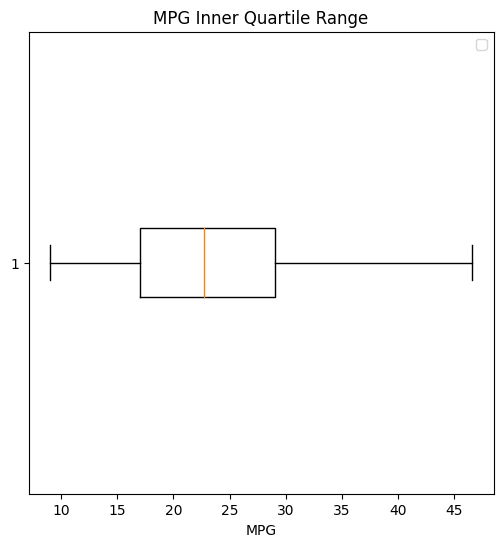

In [15]:
# Create a boxplot for MPG IQR
plt.figure(figsize=(6, 6))
plt.boxplot(df['mpg'], vert=False)

# Plot legend
plt.xlabel('MPG')
plt.title('MPG Inner Quartile Range')
plt.legend()

# Show the plot
plt.show()

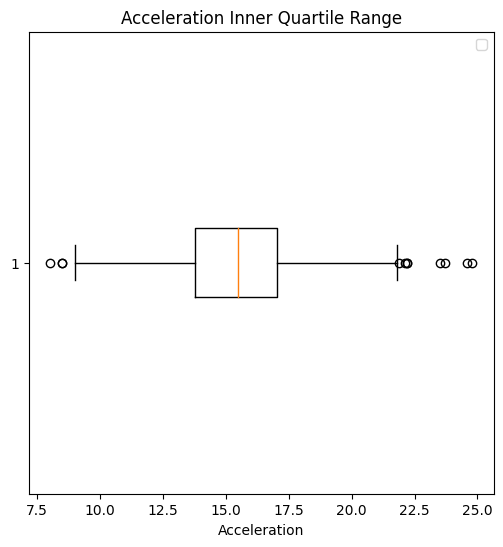

In [16]:
# Create a boxplot for acceleration
plt.figure(figsize=(6, 6))
plt.boxplot(df['acceleration'], vert=False)

# Plot legend
plt.xlabel('Acceleration')
plt.title('Acceleration Inner Quartile Range')
plt.legend()

# Show the plot
plt.show()

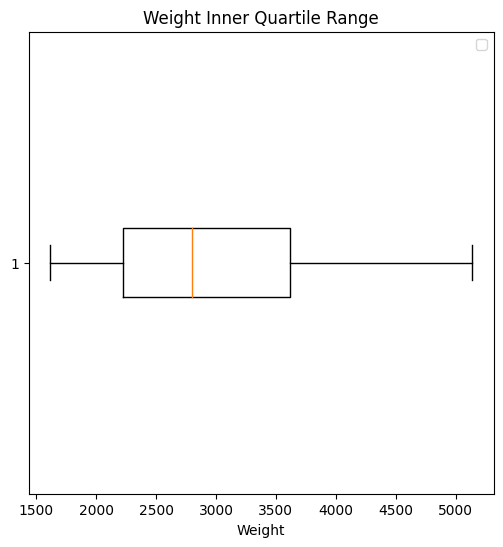

In [17]:
# Create a boxplot for weight
plt.figure(figsize=(6, 6))
plt.boxplot(df['weight'], vert=False)

# Plot legend
plt.xlabel('Weight')
plt.title('Weight Inner Quartile Range')
plt.legend()

# Show the plot
plt.show()

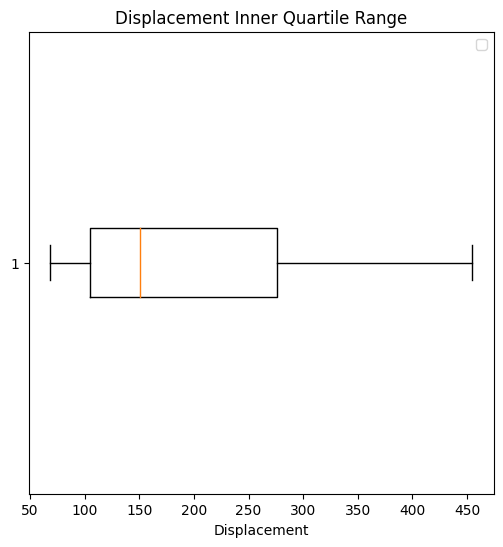

In [18]:
# Create a boxplot for displacement
plt.figure(figsize=(6, 6))
plt.boxplot(df['displacement'], vert=False)

# Plot legend
plt.xlabel('Displacement')
plt.title('Displacement Inner Quartile Range')
plt.legend()

# Show the plot
plt.show()

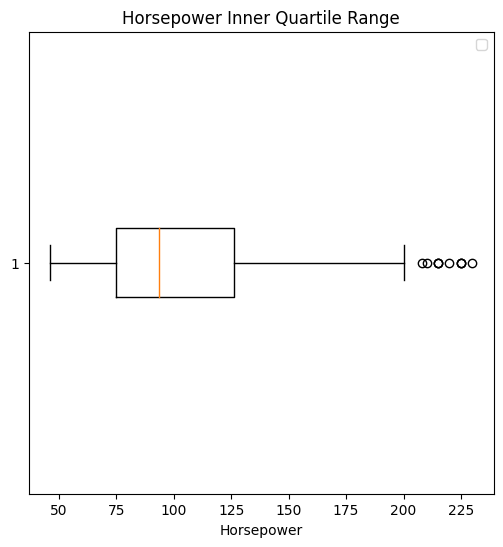

In [19]:
# Create a boxplot for horsepower
plt.figure(figsize=(6, 6))
plt.boxplot(df['horsepower'], vert=False)

# Plot legend
plt.xlabel('Horsepower')
plt.title('Horsepower Inner Quartile Range')
plt.legend()

# Show the plot
plt.show()

Text(0, 0.5, '# of Vehicles')

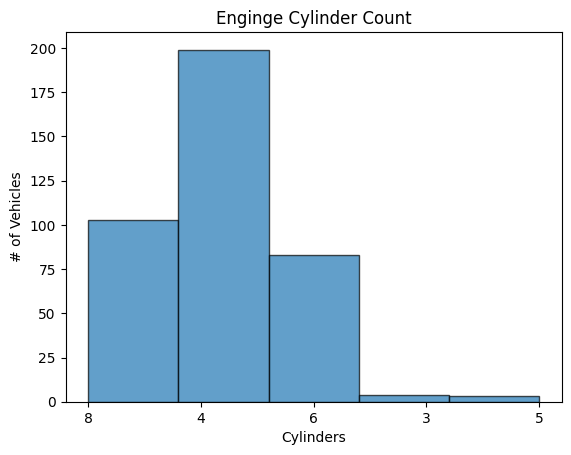

In [20]:
# Histogram of engine cylinder count
plt.hist(df['cylinders'], bins=5, edgecolor='black', alpha=0.7,)
plt.title(f'Enginge Cylinder Count')
plt.xlabel('Cylinders')
plt.ylabel('# of Vehicles')

Text(0, 0.5, '# of Vehicles')

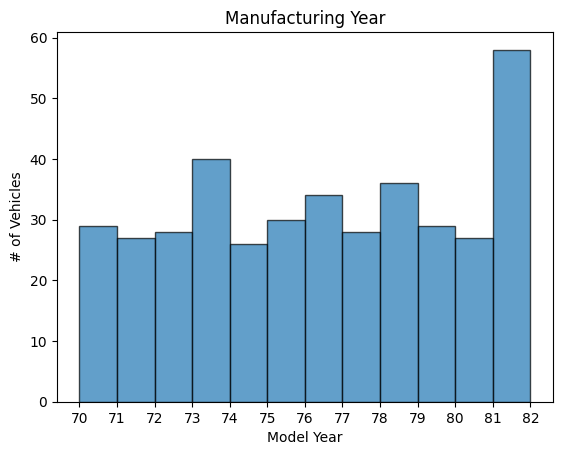

In [21]:
# Histogram of manufacturing years
plt.hist(df['model year'], bins=12, edgecolor='black', alpha=0.7)
plt.title(f'Manufacturing Year')
plt.xlabel('Model Year')
plt.ylabel('# of Vehicles')

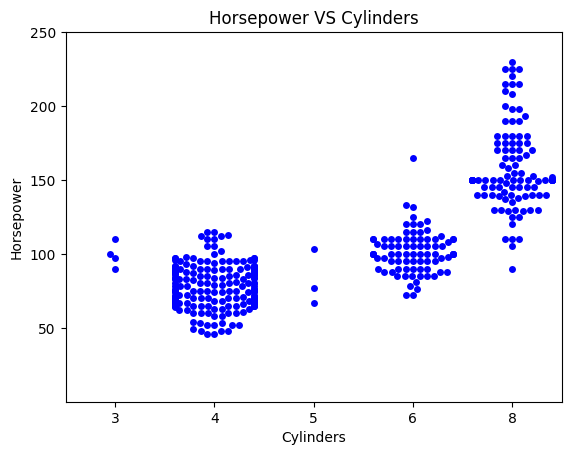

In [22]:
# Swarm plot comparing cyl
sns.swarmplot(x='cylinders', y='horsepower', data=df, color='blue', order=[3, 4, 5, 6, 8])

# Plot legend
plt.xlabel('Cylinders')
plt.ylabel('Horsepower')
plt.title('Horsepower VS Cylinders')
plt.yticks([50, 100, 150, 200, 250], ['50', '100', '150', '200', '250'])
plt.ylim(0, 250)
plt.show()

Generally speaking, manufacturers were more focused on engine power than efficiency. Vehicles were lighter during that time period, though. There are also a few vehicles with 3 and 5 cylinders. Something you don't see anymore.


#### **Data Analysis by model year**



*   IQR charts of variable distribution




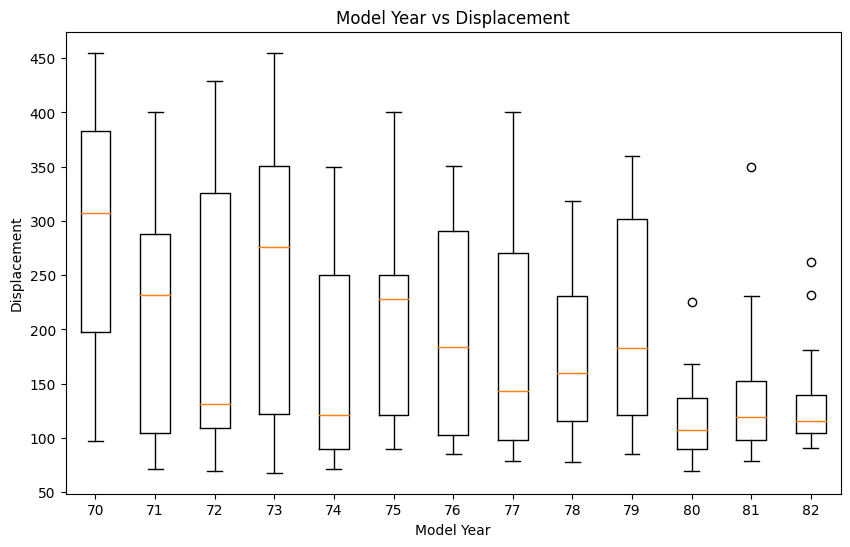

In [23]:
#Plot a boxplot measuring displacement by model year

# Sort the data by the categorical column
sorted_year = df.sort_values(by='model year')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['displacement'].values for _, group in sorted_year.groupby('model year')],
            labels=sorted_year['model year'].unique())

# Plot legend
plt.xlabel('Model Year')
plt.ylabel('Displacement')
plt.title('Model Year vs Displacement')

# Show the plot
plt.show()



There's a downward trend in engine size by model year, and a sharp drop in engine size when you reach the 80's.

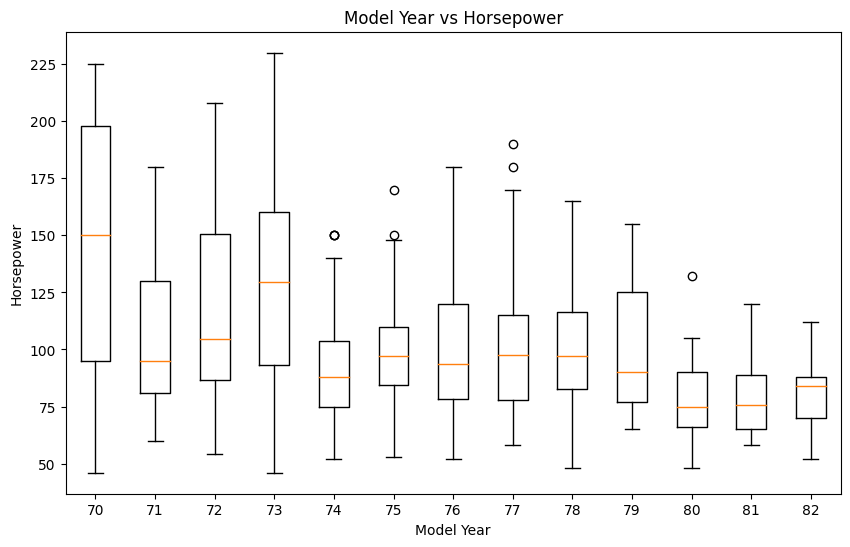

In [24]:
#Plot a boxplot measuring horsepower by model year

# Sort the data by the categorical column 'model year'
sorted_year = df.sort_values(by='model year')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['horsepower'].values for _, group in sorted_year.groupby('model year')],
            labels=sorted_year['model year'].unique())

# Plot legend
plt.xlabel('Model Year')
plt.ylabel('Horsepower')
plt.title('Model Year vs Horsepower')

# Show the plot
plt.show()


The same applies to horsepower but there's a significant drop at '74.

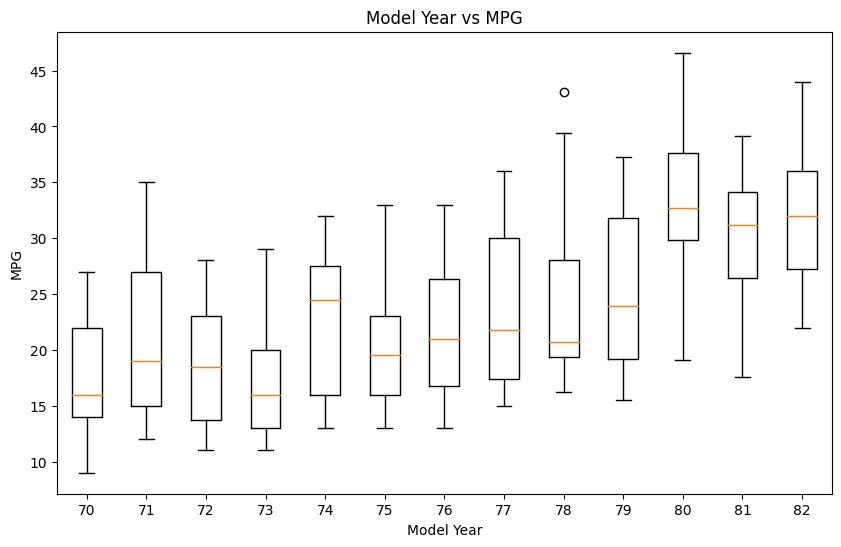

In [25]:
#Plot a boxplot measuring mpg by model year

# Sort the data by the categorical column
sorted_year = df.sort_values(by='model year')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['mpg'].values for _, group in sorted_year.groupby('model year')],
            labels=sorted_year['model year'].unique())

# Plot legend
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Model Year vs MPG')

# Show the plot
plt.show()

Fuel efficiency has the opposite trend over time. There's a steady uphill trend with significant jumps at '74 and '80.

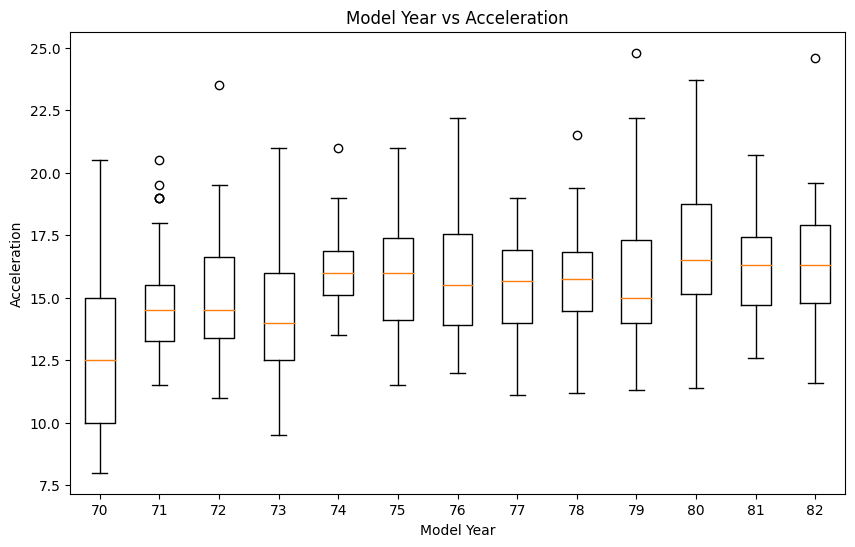

In [26]:
#Plot a boxplot measuring acceleration by model year

# Sort the data by the categorical column
sorted_year = df.sort_values(by='model year')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['acceleration'].values for _, group in sorted_year.groupby('model year')],
            labels=sorted_year['model year'].unique())

# Plot legend
plt.xlabel('Model Year')
plt.ylabel('Acceleration')
plt.title('Model Year vs Acceleration')

# Show the plot
plt.show()

There's also a slight upward trend in acceleration. The jump at '74 is larger than the jump at '80, though, so horsepower must have a bigger impact on acceleration than engine size.

## Export CSV to Drive

In [27]:
# Specify the file path for the CSV file
file_path = 'CleanedFuelEfficiency.csv'

# Export DataFrame to CSV file
df.to_csv(file_path, index=False)

# Authenticate with Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Convert data to csv string
csv_string = df.to_csv(index=False)

# Create a file on Google Drive and upload the CSV data
file = drive.CreateFile({'CleanedFuelEfficiency': 'CleanedFuelEfficiency.csv', 'mimeType': 'text/csv'})
file.SetContentString(csv_string)
file.Upload()
